# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Google-Playstore.csv', encoding= 'unicode_escape')

##Data Preprocessing


In [3]:
import re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
dataset['Total Installs(+)']=dataset['Installs'].apply(lambda x: find_number(x))
dataset['MB']=dataset['Size'].apply(lambda x: find_number(x))

In [4]:
dataset.drop(columns = ['Installs','Size','Minimum Android'],axis=1,inplace=True)

In [5]:
column_names = ['Category','MB','Total Installs(+)','Rating Count','Rating']
dataset = dataset.reindex(columns=column_names)

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset['MB'] = dataset['MB'].str.replace(" ","")
dataset['Total Installs(+)'] = dataset['Total Installs(+)'].str.replace(" ","")

In [8]:
dataset['Rating Count'] = pd.to_numeric(dataset['Rating Count'])
dataset['Rating'] = pd.to_numeric(dataset['Rating'])
dataset['Total Installs(+)'] = dataset['Total Installs(+)'].astype(float)
dataset['MB'] = pd.to_numeric(dataset['MB'])

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset = dataset[dataset.Rating != 0]

In [11]:
dataset

,Category,MB,Total Installs(+),Rating Count,Rating
1,Tools,29.0,5000.0,64.0,4.4
3,Communication,18.0,10.0,5.0,5.0
6,Libraries & Demo,25.0,1000.0,12.0,4.5
7,Lifestyle,16.0,500.0,39.0,2.0
9,Personalization,35.0,50000.0,820.0,4.7
...,...,...,...,...,...
537,Productivity,16.0,1000.0,11.0,4.5
538,Photography,79.0,1000.0,7.0,4.1
541,Shopping,18.0,500000.0,10549.0,4.4
542,Education,39.0,100.0,20.0,3.2


##Allocating features and result

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
print(X)

[['Tools' 29.0 5000.0 64.0]
 ['Communication' 18.0 10.0 5.0]
 ['Libraries & Demo' 25.0 1000.0 12.0]
 ...
 ['Shopping' 18.0 500000.0 10549.0]
 ['Education' 39.0 100.0 20.0]
 ['Puzzle' 52.0 10000.0 61.0]]


In [14]:
print(y)

[4.4 5.  4.5 2.  4.7 4.9 3.9 3.7 4.2 3.4 5.  3.7 4.4 3.8 4.2 4.6 4.1 3.4
 3.4 2.5 2.3 3.7 2.1 4.9 5.  5.  2.7 4.3 3.8 4.4 3.1 3.8 4.7 4.3 4.1 4.7
 3.1 3.7 4.9 4.3 5.  3.9 4.8 3.3 4.9 2.7 4.  4.5 2.4 3.2 3.6 3.9 3.6 2.6
 2.6 3.3 4.6 4.2 4.3 5.  4.4 4.  3.4 5.  4.  4.4 4.3 4.8 5.  4.3 1.5 3.7
 4.1 4.  3.7 4.  2.9 4.  4.6 4.3 4.8 4.1 4.9 4.8 5.  4.9 4.5 4.5 3.8 2.4
 2.5 5.  4.2 4.1 4.6 3.6 4.6 3.9 4.4 3.7 3.9 3.7 4.8 4.3 4.3 4.6 4.5 1.3
 4.3 4.  3.9 2.1 5.  3.1 4.6 3.9 4.3 3.9 5.  4.6 3.6 4.8 3.6 4.6 4.  4.7
 4.2 4.5 3.2 3.4 4.3 5.  4.4 4.1 5.  4.4 4.5 4.1 2.8 3.8 3.8 4.4 3.5 3.7
 4.  4.4 3.  3.9 4.1 3.8 3.1 4.  4.1 2.1 3.9 4.6 5.  4.2 3.4 5.  4.  4.3
 4.9 3.4 4.3 4.2 4.7 3.9 4.6 4.8 3.1 3.9 2.9 4.9 2.2 2.  4.5 4.1 3.9 4.5
 4.  3.8 5.  4.4 4.8 4.6 4.3 4.2 4.  4.9 4.3 4.5 4.7 5.  4.1 4.  3.5 4.4
 3.5 5.  3.3 4.8 4.4 4.8 4.  4.7 4.3 4.  2.8 4.5 4.4 4.5 5.  4.3 5.  2.6
 4.8 4.4 4.6 4.3 4.4 4.2 4.2 3.6 4.6 4.9 3.7 3.7 4.2 4.1 3.9 3.6 4.9 4.2
 3.2 4.2 3.9 3.8 3.8 4.2 5.  3.6 4.8 4.1 5.  5.  4.

##Filling missing values by mean

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:4])
X[:, 1:4] = imputer.transform(X[:, 1:4])

In [16]:
print(X)

[['Tools' 29.0 5000.0 64.0]
 ['Communication' 18.0 10.0 5.0]
 ['Libraries & Demo' 25.0 1000.0 12.0]
 ...
 ['Shopping' 18.0 500000.0 10549.0]
 ['Education' 39.0 100.0 20.0]
 ['Puzzle' 52.0 10000.0 61.0]]


## Encoding categorical data

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[0.0 0.0 0.0 ... 29.0 5000.0 64.0]
 [0.0 0.0 0.0 ... 18.0 10.0 5.0]
 [0.0 0.0 0.0 ... 25.0 1000.0 12.0]
 ...
 [0.0 0.0 0.0 ... 18.0 500000.0 10549.0]
 [0.0 0.0 0.0 ... 39.0 100.0 20.0]
 [0.0 0.0 0.0 ... 52.0 10000.0 61.0]]


In [19]:
print(y)

[4.4 5.  4.5 2.  4.7 4.9 3.9 3.7 4.2 3.4 5.  3.7 4.4 3.8 4.2 4.6 4.1 3.4
 3.4 2.5 2.3 3.7 2.1 4.9 5.  5.  2.7 4.3 3.8 4.4 3.1 3.8 4.7 4.3 4.1 4.7
 3.1 3.7 4.9 4.3 5.  3.9 4.8 3.3 4.9 2.7 4.  4.5 2.4 3.2 3.6 3.9 3.6 2.6
 2.6 3.3 4.6 4.2 4.3 5.  4.4 4.  3.4 5.  4.  4.4 4.3 4.8 5.  4.3 1.5 3.7
 4.1 4.  3.7 4.  2.9 4.  4.6 4.3 4.8 4.1 4.9 4.8 5.  4.9 4.5 4.5 3.8 2.4
 2.5 5.  4.2 4.1 4.6 3.6 4.6 3.9 4.4 3.7 3.9 3.7 4.8 4.3 4.3 4.6 4.5 1.3
 4.3 4.  3.9 2.1 5.  3.1 4.6 3.9 4.3 3.9 5.  4.6 3.6 4.8 3.6 4.6 4.  4.7
 4.2 4.5 3.2 3.4 4.3 5.  4.4 4.1 5.  4.4 4.5 4.1 2.8 3.8 3.8 4.4 3.5 3.7
 4.  4.4 3.  3.9 4.1 3.8 3.1 4.  4.1 2.1 3.9 4.6 5.  4.2 3.4 5.  4.  4.3
 4.9 3.4 4.3 4.2 4.7 3.9 4.6 4.8 3.1 3.9 2.9 4.9 2.2 2.  4.5 4.1 3.9 4.5
 4.  3.8 5.  4.4 4.8 4.6 4.3 4.2 4.  4.9 4.3 4.5 4.7 5.  4.1 4.  3.5 4.4
 3.5 5.  3.3 4.8 4.4 4.8 4.  4.7 4.3 4.  2.8 4.5 4.4 4.5 5.  4.3 5.  2.6
 4.8 4.4 4.6 4.3 4.4 4.2 4.2 3.6 4.6 4.9 3.7 3.7 4.2 4.1 3.9 3.6 4.9 4.2
 3.2 4.2 3.9 3.8 3.8 4.2 5.  3.6 4.8 4.1 5.  5.  4.

In [20]:
dataset.shape

(264, 5)

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [23]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4.2  4.5 ]
 [3.59 3.7 ]
 [3.57 5.  ]
 [4.98 4.2 ]
 [3.19 3.8 ]
 [4.2  4.2 ]
 [4.98 3.3 ]
 [4.44 4.1 ]
 [3.68 4.  ]
 [3.77 5.  ]
 [4.32 3.6 ]
 [4.11 4.6 ]
 [4.94 5.  ]
 [3.42 3.7 ]
 [4.44 4.  ]
 [3.77 5.  ]
 [4.13 5.  ]
 [3.9  2.1 ]
 [3.2  4.7 ]
 [3.81 4.5 ]
 [4.95 4.9 ]
 [4.95 3.6 ]
 [4.22 4.9 ]
 [3.81 3.7 ]
 [3.68 4.2 ]
 [3.81 3.8 ]
 [4.93 4.1 ]
 [4.13 2.7 ]
 [4.15 3.6 ]
 [3.74 3.7 ]
 [4.84 4.8 ]
 [4.96 3.5 ]
 [4.4  3.9 ]
 [3.92 4.6 ]
 [4.02 4.3 ]
 [3.92 4.3 ]
 [3.82 4.7 ]
 [4.2  4.  ]
 [3.21 2.3 ]
 [4.22 5.  ]
 [4.1  4.  ]
 [4.67 4.1 ]
 [3.25 4.9 ]
 [4.11 2.1 ]
 [4.03 2.6 ]
 [4.2  4.8 ]
 [3.91 4.4 ]
 [4.39 3.9 ]
 [4.14 5.  ]
 [3.57 2.9 ]
 [4.2  4.2 ]
 [4.07 4.8 ]
 [4.43 4.1 ]
 [3.89 4.  ]
 [3.77 4.9 ]
 [4.04 4.  ]
 [4.16 3.7 ]
 [3.89 4.9 ]
 [4.07 4.2 ]
 [3.59 3.5 ]
 [4.45 4.6 ]
 [4.2  4.4 ]
 [3.78 3.4 ]
 [3.79 4.6 ]
 [3.7  4.2 ]
 [3.56 4.2 ]]


##Model Evaluation by r2_score

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.3145505015930512

##Model Evaluation by Root Mean Squared Error(RMSE)

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=True)

0.6636005443028135

##Model Evaluation by Mean Squared Error(MSE)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.8146168082619051

##Model Evaluation by Mean Absolute Error(MAE)

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.6387940654747948

##Visualising Results

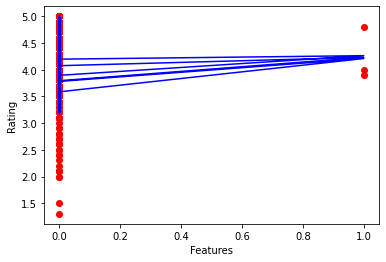

In [28]:
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X[:,0], regressor.predict(X), color = 'blue')
plt.xlabel('Features')
plt.ylabel('Rating')
plt.show()